**[2024-2] CSC4023 Deep Learning (딥러닝입문)**

Exercise 01: Mathematics for AI

- Exercise using NumPy and PyTorch that cover some mathematics concepts

## Vector calculations

* Goal: understand vector and matrix operations essential for DL

* Implement basic vector and matrix operations using NumPy:
  * Numpy의 함수들을 사용하세요

1.  Dot product (inner product): 두 벡터의 dot product를 계산하여 반환하는 함수 `dot_product`

2. Matrix multiplication: 두 행렬의 곱을 계산하여 반환하는 함수 `matrix_mult`

3. Euclidean norm: 벡터의 euclidean norm를 계산하여 반환하는 함수 `euclidean_norm`

4. Cosine similarity: 두 벡터의 cosine similarity를 계산하는 함수 `cos_similarity`
  - `dot_product`와 `euclidean_norm`을 활용하세요.
  - cosine similarity:

  $$\text{cos} ~\theta = \frac{{\bf u} \cdot {\bf v}}{ \lVert {\bf u} \rVert \lVert {\bf v} \rVert }$$


5. Simple linear transformation: $y = {\bf W} {\bf x} + {\bf b}$
  - weight matrix ${\bf W}$ and bias vector ${\bf b}$
  - 행렬 ${\bf W}$과 벡터 ${\bf b}, {\bf x}$에 대한 linear transformation을 계산하여 반환하는 함수 `lin_transformation`

  

In [1]:
# import numpy
import numpy as np

# 아래를 구현하세요.
# 1. dot_product function for computing dot product of two vectors
def dot_product(u, v):
    return np.dot(u, v)

# 2. matrix_mult function for computing matrix multiplication of two matrix
def matrix_mult(A, B):
    return np.matmul(A, B)

# 3. euclidean_norm function for computing euclidean norm of a vector
def euclidean_norm(u):
    return np.linalg.norm(u)

# 4. cos_similarity function for computing cosine similarity of two vectors
def cos_similarity(u, v):
    dot_product_value = np.dot(u, v)
    norm_u = np.linalg.norm(u)
    norm_v = np.linalg.norm(v)
    return dot_product_value / (norm_u * norm_v)

# 5. lin_transformation function for computing y = Wx + b
def lin_transformation(W, x, b):
    return np.dot(W, x) + b


* Test case:
  - 아래의 테스트 예제에 대해 다음과 같이 잘 동작해야 합니다:
  ```
  .....
  Ran 5 tests in 0.010s
  OK
  ```
  - 동작 시간 (예: 0.010s) 은 다를 수 있습니다.



In [2]:
import unittest
import time

# Test class: 이 셀은 수정하지 마세요.
class TestVectorCalculations(unittest.TestCase):

    def setUp(self):
        # Define common variables for testing
        self.u = np.array([1, 3, 5])
        self.v = np.array([2, 4, 6])
        self.A = np.array([[1, 2], [3, 4]])
        self.B = np.array([[5, 6], [7, 8]])
        self.W = np.array([[1, 2, 3], [4, 5, 6]])  # 2x3 matrix
        self.x = np.array([1, 0, 1])  # 3x1 vector
        self.b = np.array([1, 1])  # 2x1 bias vector

    def test_dot_product(self):
        expected = 44
        result = dot_product(self.u, self.v)
        # print(f"Computed dot product of {self.u} and {self.v}: {dot_product(self.u, self.v)}")
        self.assertEqual(result, expected, f"Expected {expected}, but got {result}")

    def test_matrix_mult(self):
        expected = np.array([[19, 22], [43, 50]])
        result = matrix_mult(self.A, self.B)
        # print(f"Computed matrix multiplication of A and B:\n{matrix_mult(self.A, self.B)}")
        self.assertTrue(np.array_equal(result, expected), f"Expected {expected}, but got {result}")

    def test_euclidean_norm(self):
        expected = np.sqrt(35)
        result = euclidean_norm(self.u)
        # print(f"Computed euclidean norm of {self.u}: {euclidean_norm(self.u)}")
        self.assertAlmostEqual(result, expected, places=6, msg=f"Expected {expected}, but got {result}")

    def test_cos_similarity(self):
        expected = 0.9938586931957764
        result = cos_similarity(self.u, self.v)
        # print(f"Computed cosine similarity between {self.u} and {self.v}: {cos_similarity(self.u, self.v)}")
        self.assertAlmostEqual(result, expected, places=6, msg=f"Expected {expected}, but got {result}")

    def test_lin_transformation(self):
        expected = np.array([5, 11])
        result = lin_transformation(self.W, self.x, self.b)
        # print(f"Computed linear transformation y = Wx + b: {lin_transformation(self.W, self.x, self.b)}")
        self.assertTrue(np.array_equal(result, expected), f"Expected {expected}, but got {result}")

# Test suite for TestVectorCalculations
def run_vector_cal_tests():
  suite = unittest.TestSuite()
  suite.addTest(unittest.makeSuite(TestVectorCalculations))
  runner = unittest.TextTestRunner()
  runner.run(suite)

# Run the tests
if __name__ == '__main__':
  print("===== Test case =====")
  print(f"vector u = {np.array([1, 3, 5])}, v = {np.array([2, 4, 6])}")
  print(f"matrix A = \n{np.array([[1, 2], [3, 4]])}")
  print(f"matrix B = \n{np.array([[5, 6], [7, 8]])}")
  print(f"matrix W = \n{np.array([[1, 2, 3], [4, 5, 6]])}")
  print(f"vector x = {np.array([1, 0, 1])}, b = {np.array([1, 1])}")
  print("=====================")
  time.sleep(0.5)

  run_vector_cal_tests()

===== Test case =====
vector u = [1 3 5], v = [2 4 6]
matrix A = 
[[1 2]
 [3 4]]
matrix B = 
[[5 6]
 [7 8]]
matrix W = 
[[1 2 3]
 [4 5 6]]
vector x = [1 0 1], b = [1 1]


.....
----------------------------------------------------------------------
Ran 5 tests in 0.004s

OK


## Gradient calculation

* Goal: understand the concept of gradients and how to compute them manually and using PyTorch's `backward` for this purpose

1. Manually compute the gradient of a quadratic function $f(x) = x^2 + 3x + 2$ using basic calculus
  - 직접 위 함수의 gradient를 계산하여 반환하는 함수 `manual_grad`

2. Use PyTorch to compute the gradient with `backward`
  - PyTorch의 `backward` (혹은 `autograd`)를 사용하여 gradient를 계산하여 반환하는 함수 `torch_grad`

In [3]:
# import Pytorch, NumPy
import torch
import numpy as np

# 1. manual_grad function for manually computing the gradient for f(x) = x^2 + 3x + 2
def manual_grad(x):
    return 2 * x + 3

# 2. torch_grad function using PyTorch's backward to compute the gradient
def torch_grad(x_val):
    x = torch.tensor(float(x_val), requires_grad=True)
    
    f = x**2 + 3*x + 2
    
    f.backward()
    
    return x.grad.item()


* Test case:
  - 아래의 테스트 예제에 대해 다음과 같이 잘 동작해야 합니다:
  ```
  ..
  Ran 2 tests in 0.004s
  OK
  ```



In [4]:
import unittest
import time

# Test class: 이 셀은 수정하지 마세요.
class TestGradientCalculations(unittest.TestCase):

    def test_manual_grad(self):
        # Test for x = 5
        x_val = 5
        expected_grad = 2 * x_val + 3  # manual calculation
        result = manual_grad(x_val)
        print(f"Computed gradient for x = {x_val} using manual_grad: {result}")
        self.assertEqual(result, expected_grad, f"Expected {expected_grad}, but got {result}")

    def test_torch_grad(self):
        # Test for x = 5
        x_val = 5
        expected_grad = 2 * x_val + 3  # Same expected result as manual
        result = torch_grad(x_val)
        print(f"Computed gradient for x = {x_val} using torch_grad: {result}")
        self.assertEqual(result, expected_grad, f"Expected {expected_grad}, but got {result}")

# Test suite for TestGradientCalculations
def run_grad_cal_tests():
  suite = unittest.TestSuite()
  suite.addTest(unittest.makeSuite(TestGradientCalculations))
  runner = unittest.TextTestRunner()
  runner.run(suite)

# Run the tests
if __name__ == '__main__':
  print("===== Test case =====")
  print(f"x = 5")
  print("=====================")
  time.sleep(0.5)

  run_grad_cal_tests()

===== Test case =====
x = 5


..

Computed gradient for x = 5 using manual_grad: 13
Computed gradient for x = 5 using torch_grad: 13.0



----------------------------------------------------------------------
Ran 2 tests in 0.051s

OK


## Partial derivatives in multi-variable functions

* Goal: practice calculating partial derivatives for multi-variable functions using PyTorch and NumPy

Given the function:
$$
f(x,y) = x^2 + y^2 + 3xy
$$

* Use PyTorch to compute the partial derivatives $\partial f / \partial x$ and $\partial f / \partial y$ with `backward` (or `autograd`)
  - x, y에 대한 편미분 (partial derivatives) 을 계산하여 반환하는 함수 `torch_partial_der`

In [5]:
# import PyTorch
import torch

# 1. torch_partial_der function for computing partial derivatives df/dx, df/dy using PyTorch
def torch_partial_der(x_val, y_val):
    x = torch.tensor(float(x_val), requires_grad=True)
    y = torch.tensor(float(y_val), requires_grad=True)
    
    f = x**2 + y**2 + 3*x*y
    
    f.backward()
    
    return x.grad.item(), y.grad.item()


* Test case:
  - 아래의 테스트 예제에 대해 다음과 같이 잘 동작해야 합니다:
  ```
  .
  Ran 1 test in 0.004s
  OK
  ```



In [6]:
import unittest
import time

# Test class: 이 셀은 수정하지 마세요.
class TestDerivativeCalculations(unittest.TestCase):
    def test_torch_der(self):
        # Test for x = 2, y = 3
        x_val = 2
        y_val = 3
        expected_der_x = 2 * x_val + 3 * y_val
        expected_der_y = 2 * y_val + 3 * x_val
        result_x, result_y = torch_partial_der(x_val, y_val)
        print(f"Computed gradient for x = {x_val} using torch_partial_der: {result_x}")
        print(f"Computed gradient for y = {y_val} using torch_partial_der: {result_y}")
        self.assertEqual(result_x, expected_der_x, f"Expected {expected_der_x}, but got {result_x}")
        self.assertEqual(result_y, expected_der_y, f"Expected {expected_der_y}, but got {result_y}")

# Test suite for TestGradientCalculations
def run_der_cal_tests():
  suite = unittest.TestSuite()
  suite.addTest(unittest.makeSuite(TestDerivativeCalculations))
  runner = unittest.TextTestRunner()
  runner.run(suite)

# Run the tests
if __name__ == '__main__':
  print("===== Test case =====")
  print(f"x = 2, y = 3")
  print("=====================")
  time.sleep(0.5)

  run_der_cal_tests()

===== Test case =====
x = 2, y = 3


.

Computed gradient for x = 2 using torch_partial_der: 13.0
Computed gradient for y = 3 using torch_partial_der: 12.0



----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


* Visualize the function and its gradient using contour plots

  - Option: 다음을 실행하여 시각화 결과가 잘 나오는지 확인해보세요.

- 첫번째 이미지: 함수 $f(x,y)$의 3D plot

    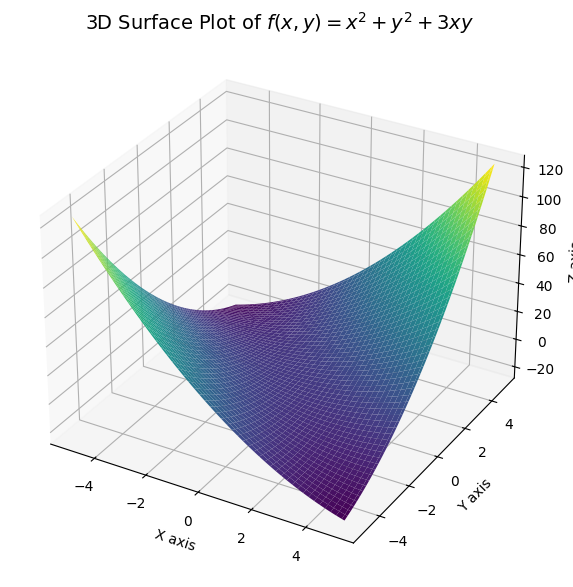



  - 두번째 이미지: $f$의 gradient 2D contour plot

      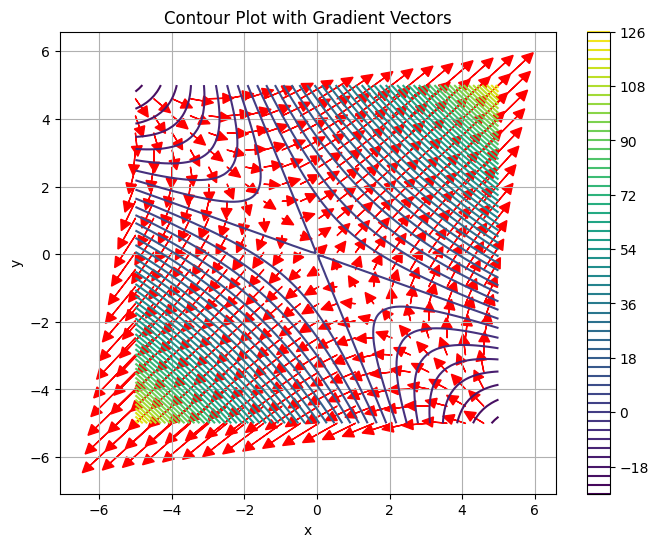

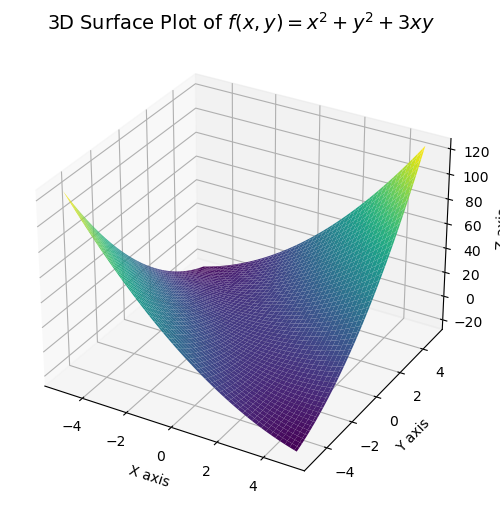

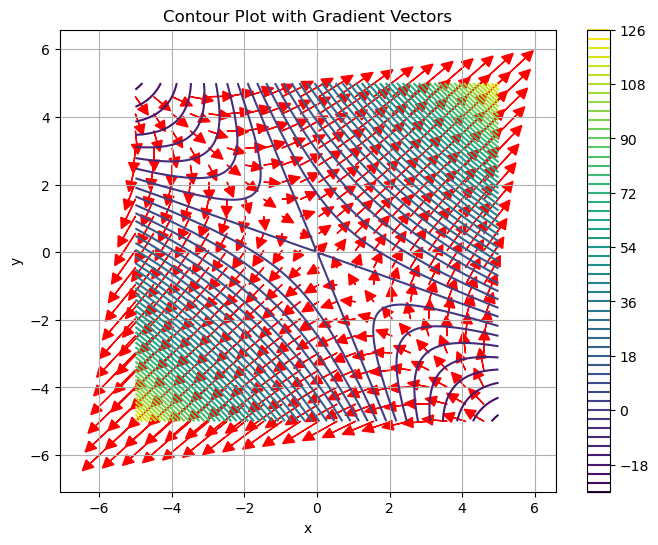

In [7]:
# Option: visualize 2D contour plot: 이 셀은 수정하지 마세요.
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function f(x, y) = x^2 + y^2 + 3xy
def f(x, y):
    return x**2 + y**2 + 3 * x * y

# Create a meshgrid for plotting
x_vals = np.linspace(-5, 5, 100)
y_vals = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

# Create a 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

# Plot the surface
ax.plot_surface(X, Y, Z, cmap="viridis", edgecolor="none")

# Labels and title
ax.set_title(r"3D Surface Plot of $f(x, y) = x^2 + y^2 + 3xy$", fontsize=14)
ax.set_xlabel("X axis")
ax.set_ylabel("Y axis")
ax.set_zlabel("Z axis")

# Show the plot
plt.show()

# Create the contour plot
plt.figure(figsize=(8, 6))
contour = plt.contour(X, Y, Z, 50, cmap="viridis")
plt.colorbar(contour)

# Add gradient arrows to the plot using "your torch_partial_der" function
stride = 5
for i in range(0, X.shape[0], stride):
    for j in range(0, X.shape[1], stride):
        grad_x, grad_y = torch_partial_der(X[i, j], Y[i, j])
        plt.arrow(X[i, j], Y[i, j], grad_x * 0.05, grad_y * 0.05, head_width=0.3, head_length=0.3, fc="red", ec="red")

plt.title("Contour Plot with Gradient Vectors")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()